In [ ]:
""" 
Derived from analysis_line2_multsession..
Here meant to be general (e.g., lines5 also).
this eventually should replace lines2 code.

"strokemodel" is plots using statistics across all single strokes.
Also includes model-based score.

CODE focusing on analyses with datapoint = stroke,.

THIS IS GOOD CODE - lots of stuff.
"""

In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/data1/code/python/drawmonkey


In [4]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.line2 import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
from analysis.line2_strokmodelfits import *
from analysis.modelexpt import modelResultsGetter


In [7]:
from pythonlib.tools.datetools import getDateList
from analysis.line2 import PROBEDATfromFD
import seaborn as sns
import pandas as pd
from analysis.line2 import probedat2strokefeats, strokfeats2Dataframe
from analysis.modelexpt import *



## 9/22/20 - what I now think as important plots


2) Analyze curvature as a measurement of bendiness



1) In general, use stroke model to assign probabilites for each strok for being of certain class (use strokModel)


# STROKE STATISTICS - ACROSS ANIMALS



# CODE DEVElOPMENT

In [ ]:
## WAYS TO QUANTIFY VARIABILITY OF STROKES
# 1) covariance structure (plto as clouds on eac point)
# 2) same, but only onset and offset, which makes thingse asier
# 3) resampling
# 4) plot x and y separately?
# 5) align onto a 1d-axis, which is along the task (difficult to do... prob ignore)

# lthere are tasks that are fixed in one set of days but random in other./`

In [ ]:
## Not just motor habit - order often differs (both of stroke and of direction within stroke).

# but becomes more and more like motor habit as more practice:
# - correalted timecourses.


In [ ]:
# 1) clean strokes DONE
# 2) mean 1st, second, etc DONE
# 3) seaprate by stroke num DONE
# 4) plot 1st N trials each day DONE
# 5) plot N (matched)


## score behavior


# plot one specific task

In [ ]:
# Learning - same task over time/days


In [ ]:
# Collect all cases where same task is done in different contexts:
# 1) Same animal, diff training
# 2) Diff animal, diff training
# 3) Diff animal, same training (might not be any of this)



In [ ]:
# During 2-stroke, stop after secind stroke?

# Trial end after lift > N seconds? Plot timing distryubitnos./

In [ ]:
# Can decode character?


In [ ]:
# Get more stereotyped with practice 
# seems clear from psychometric tasks

In [ ]:
# CHECK ANALYSES TO DO IN SPREADSHEET

## structure of variability

1. same task, different primitives
2. same task, same primitives, different order.
3. relates to psychometric functions - what stimulus features drive this variability?
4. reduction in variability over experiences.
5. motor-level variability, in timing and kinematics

[note: all of these maybe addressed by done-button verson, where seems to be more variability
- also, variability of number of strokes]

IMPoRTANT: if question is what drives structure of variablity, answer might be depends on prior knowledge. Goal of analyses is to see whether structure of variability influenced by this prior knowledge.

## motor analyses

1) motor-level invariance:
    same stroke different tasks
    same bigram strokes diff tasks
    
    the above, but same task different parses
    Goal:
        if so, then can do modeling of primitives?
        if so, then useful for neural recordings?
        

## EMAIL TO SELF - good outline


    A) First analysis just show that is copying task correctly.
    - shuffle across task categories. shuffle within task categories.
    - better or worse given different models?


    B) Second, look at compositional structure
    Different analyses to look at structure difference for
    compositionality v1 (strokes):

    1) Stroke statistics:
    - length, straightness, etc.
    - bag of strokes, across all tasks, showing that depend on training. compare to models (ground truth (two models) and spline fit).

    - [spline fit model] - THINK ABOUT THIS - not obvious if would work, since here is compositionality v1.

    - task by task, ask whether beahvior matches model. shuffle tasks.


## STROKE STATISTICS


### 1) Extract one datapoint for each stroke (flat across trials)

In [5]:
expt = "lines5"


# TO DO:
- simplify, dont need to reextract SF so many times.
- make plots into a fincution

## TODO: insert the below for loading FD

In [ ]:
# 1) Load data across days

for animal in ["Red", "Pancho"]:
# for animal in ["Red"]:
    # for animal in ["Pancho"]:
    
    FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
    sdate = MD["sdate"]
    edate = MD["edate"]
    strokmodel_kind = MD["strokmodel_kind"]
    strokmodel_tstamp = MD["strokmodel_tstamp"]
    datecategories = MD["datecategories"]
    dates_for_summary = MD["dates_for_summary"]
    matchedstrokes = MD["matchedstrokes"]
    task_train_test = MD["task_train_test"]
    datelist_all = getDateList(sdate, edate)
    exptMetaDat = MD
    
#     dattoget = []
#     for d in datelist_all:
#         dattoget.append([expt, animal, d])
        
#     FD = loadMultData(dattoget)

    # saving dir
    SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_modelexpt_multsession/{expt}/multday_{animal}_{sdate}_to_{edate}/strokmodel"
    import os
    os.makedirs(SAVEDIR, exist_ok=True)
    print(f"saving at {SAVEDIR}")

    # ==== Flatten all trials across days x animals
    # for each trial collect relevant information
    PROBEDAT = PROBEDATfromFD(FD)
    

    # ==== EXTRACT STROKE MODEL RESULTS
    if strokmodel_kind is not None:
        modResGetter = modelResultsGetter(PROBEDAT, model=strokmodel_kind, 
                                          fit_tstamp = strokmodel_tstamp)
    else:
        modResGetter = None

        

        
    # ********** OVERVIEW OF SCHEDULE.
    from pythonlib.tools.snstools import rotateLabel
    # then should get all trials to make sure not miss any
    from pythonlib.tools.datetools import getDateList
    only_shared_tasks = False # not needed, since will filter below to make sure in both epochs.
    strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, datelist_all, only_shared_tasks=only_shared_tasks)

    ## CONVERT TO DATAFRAME FOR PLOTTING
    SF = pd.DataFrame(strokfeats)

    ## APPEND columns refelcting experimental structure
    from pythonlib.tools.pandastools import applyFunctionToAllRows

#     # --- aggregate over strokes of a desired index
#     F = lambda x:x["strokenum"] in matchedstrokes
#     SF = applyFunctionToAllRows(SF, F, newcolname="keepstroke")

    # --- aggregate over strokes of a desired index
    F = lambda x:datecategories[x["date"]]
    SF = applyFunctionToAllRows(SF, F, newcolname="epoch")

    # --- call each task either test or train
    F = lambda x:task_train_test[x["task_kind"]]
    SF = applyFunctionToAllRows(SF, F, newcolname="traintest")

    fig1 = sns.catplot(x="date", y="task_category", hue="random_task", data=SF, aspect=3, row_order=sorted(set(SF["task_category"])), alpha=0.02)
    fig2 = sns.catplot(x="date", y="task_category", hue="random_task", row="traintest", data=SF, aspect=3, alpha=0.02)
    fig4 = sns.catplot(x="date", y="task_category", row="random_task", col="traintest", hue="task_kind",
                     sharex=True, sharey=False, aspect=2, data=SF, orient="v", alpha=0.05)
    rotateLabel(fig4, 25)
    
    # for fixed tasks only
    # sns.catplot(x="date", y="task", hue="task_category", row="traintest", data=SF[SF["random_task"]==False], 
    #             height=10, aspect=1, row_order=sorted(set(SF["task"])))
    H = len(list(set(SF[SF["random_task"]==False]["task"])))*(1/5)
    fig3 = sns.catplot(x="date", y="task", hue="task_category", row="traintest", data=SF[SF["random_task"]==False], 
                height=H, aspect=1, )
    
    fig1.savefig(f"{SAVEDIR}/overview-1.pdf")
    fig2.savefig(f"{SAVEDIR}/overview-2.pdf")
    fig3.savefig(f"{SAVEDIR}/overview-3.pdf")
    fig4.savefig(f"{SAVEDIR}/overview-4.pdf")

    
    # ******************************************************
    # ==== STROK FEATURE PLOTS
    #     for traintest in ["test", "train","bothtraintest"]:
    for traintest in ["test", "train"]:

        for only_first_last_trials in [False]:
    #         = True # then gets last trial of epoch 1 and first trial of epoch 2

            if only_first_last_trials:
                # then should get all trials to make sure not miss any
                datelist = datelist_all
            else:
                datelist = dates_for_summary

            only_shared_tasks = False # no need for True, since will filter below to make sure in both epochs.
            strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, datelist, only_shared_tasks=only_shared_tasks)

            # ==== add model results to strokfeats
            if False:
                ## assign model results to each individual stroke
                # [SCRATCH HERE]
                for s in strokfeats:

                    s["mod_res"] = modResGetter(animal, date=s["date"], expt=expt, session=s["session"], trial=s["trial"], 
                                                strok_num=s["strokenum"])


                SF = pd.DataFrame(strokfeats)
                SF = pd.DataFrame([s for s in strokfeats if s["mod_res"] is None])
                sns.catplot(x="date", y="distance", data=SF, height=20)

                SF = pd.DataFrame([s for s in strokfeats if s["mod_res"] is not None])
                sns.catplot(x="date", y="distance", data=SF, height=20)

            k = "Lstrokeindex"
            m = lambda date, session, trial, strok_num: modResGetter(animal, date, expt, 
                                                                     session, trial, strok_num)
            SF = strokfeats2Dataframe(strokfeats, exptMetaDat, only_first_last_trials=only_first_last_trials,
                         matchedstrokes=matchedstrokes, 
                         traintest=traintest, modResGetter=m,
                        modResKeyname=k, only_if_has_model_res=True,
                        only_if_task_in_all_epochs=True)

            if len(SF)==0:
                print(f"SKIPPING {animal}, {traintest}, {only_first_last_trials}, since no trials after pruning")
                continue

            # === MAKE SAVE DIRECTORY
            if only_first_last_trials:
                SAVEDIRTHIS = f"{SAVEDIR}/strokefeatures_firstlasttrials_{traintest}"
                import os 
                os.makedirs(SAVEDIRTHIS, exist_ok=True)
            else:
                SAVEDIRTHIS = f"{SAVEDIR}/strokefeatures_alltrials_{traintest}"
                import os 
                os.makedirs(SAVEDIRTHIS, exist_ok=True)    

            # -- plot timecouers summary over days - e.g, what days have mmodels core?
            fig1 = sns.catplot(data=SF, x="date", y=k, aspect=3, hue="epoch")
            fig2 = sns.catplot(data=SF, x="date", y="distance", aspect=3, hue="epoch")
            fig1.savefig(f"{SAVEDIRTHIS}/overview_alltrials_onlyifhasmodel.pdf")
            fig2.savefig(f"{SAVEDIRTHIS}/overview_alltrials.pdf")


            # --- plot date for each task
            #             from pythonlib.tools.snstools import rotateLabel
            fig = plt.figure(figsize=(15,10))
            ax = sns.scatterplot(data=SF, x="date", y="task", hue="epoch")
            if only_first_last_trials:
                plt.title("last trial (first epoch) and first trial (last epoch)")                  
            else:
                plt.title("all trials")
            # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            fig.savefig(f"{SAVEDIRTHIS}/overview_timeline.pdf")

            # reget new tasklist
            TASKLIST = sorted(set(SF["task"].values))

            # =========== PLOT - one plot per task
            for task in TASKLIST:
                SFthis = SF.loc[SF["task"]==task]
            #     SF = pd.DataFrame([s for s in strokfeats if s["task"]==task])

                # -- PLOT
                fig = sns.pairplot(SFthis, vars = ["strokenum", "circularity", "distance", k, "epoch"], hue="date")
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-1.pdf")
                fig = sns.pairplot(SFthis, vars = ["strokenum", "circularity", k, "distance"], hue="epoch")
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-2.pdf")
                fig = sns.catplot(data=SFthis, x="epoch", y="distance", col="strokenum", hue="date", jitter=True, aspect=0.5)
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-3.pdf")
                fig = sns.catplot(data=SFthis, x="epoch", y="circularity", col="strokenum", hue="date", jitter=True, aspect=0.5)
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-4.pdf")
                fig = sns.catplot(data=SFthis, x="epoch", y=k, col="strokenum", hue="date", jitter=True, aspect=0.5)
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-5.pdf")

                # -- PLOT, aggregating over first N strokes.
                SF2 = SFthis.loc[SFthis["keepstroke"]==True]
                fig = sns.pairplot(SF2, vars = ["circularity", "distance", k, "epoch"], hue="date")
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-1.pdf")
                fig = sns.pairplot(SF2, vars = ["circularity", "distance",  k], hue="epoch")
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-2.pdf")
                fig = sns.catplot(data=SF2, x="epoch", y="distance", hue="date", jitter=True, aspect=0.5)
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-3.pdf")
                fig = sns.catplot(data=SF2, x="epoch", y="circularity", hue="date", jitter=True, aspect=0.5)
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-4.pdf")
                fig = sns.catplot(data=SF2, x="epoch", y=k, hue="date", jitter=True, aspect=0.5)
                fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-5.pdf")

                plt.close("all")


            ## ==== Summary across tasks
            # aggregate: for each task, get one value for epoch 1, one value for epoch 2
            # (aggreagte over stroke and days)

            # -- 1) Do aggregation
            from pythonlib.tools.pandastools import aggregGeneral
            group = ["task", "epoch"]
            values = ["circularity", "distance"]
            values.append(k)
            SFagg = SF.loc[SF["keepstroke"]==True]
            SFagg = aggregGeneral(SFagg, group, values, aggmethod=["mean", "median"])


            # -- 2) Plot
            ylist = [f"{y}_median" for y in values]

            for y in ylist:
                from pythonlib.tools.snstools import rotateLabel

                fig = sns.catplot(x ="task", y=y, data=SFagg, hue="epoch", aspect=3)
                rotateLabel(fig)
                fig.savefig(f"{SAVEDIRTHIS}/summary_aggregStrokesDates-{y}-1.pdf")

            #     sns.catplot(data=SFagg, x="epoch", y=y)
            #     sns.catplot(data=SFagg, x="epoch", y=y, kind="point")
                fig = plt.figure(figsize=(10,5))

                plt.subplot(121)
                for task in set(SFagg["task"]):
                    sns.lineplot(data=SFagg.loc[SFagg["task"]==task], x="epoch", y=y, color="k", alpha=0.5)
                sns.lineplot(data=SFagg, x="epoch", y=y)

                plt.subplot(122)
                Y = SFagg.pivot(index="task", columns="epoch", values=y)
                Y = pd.DataFrame(Y.to_records())
            #         fig = plt.figure(figsize=(5,5))
                sns.scatterplot(data =Y, x="1", y="2")
                plt.xlabel("epoch")
                plt.ylabel("epoch")

                fig.savefig(f"{SAVEDIRTHIS}/summary_aggregStrokesDates-{y}-2.pdf")

                # --
                fig = sns.pairplot(SFagg, vars = ["circularity_median", "distance_median", f"{k}_median"], hue="epoch", height=5)
                fig.savefig(f"{SAVEDIRTHIS}/summary_aggregStrokesDates-{y}-3.pdf")

                plt.close("all")

### Summary of generative strok model results


In [29]:
## here plotting distribution of model scores etc.
SF

,strokenum,session,trial,date,task,datetime,task_kind,task_category,random_task,circularity,distance,Lstrokeindex,keepstroke,index_x,epoch,index_y,traintest,distance_binned
250,0,1,231,200923,3linePlusL_4-savedset-1,2020-09-23 14:22:41,probe3,3linePlusL,False,0.044359,200.998617,0.513852,True,250,1,250,test,3
251,1,1,231,200923,3linePlusL_4-savedset-1,2020-09-23 14:22:41,probe3,3linePlusL,False,0.105631,139.422777,0.569149,True,251,1,251,test,2
252,2,1,231,200923,3linePlusL_4-savedset-1,2020-09-23 14:22:41,probe3,3linePlusL,False,0.011961,103.210375,0.634984,True,252,1,252,test,1
421,0,1,308,200923,linePlusLv2_47-savedset-3,2020-09-23 14:40:51,probe3,linePlusLv2,False,0.212367,357.991496,0.655069,True,421,1,421,test,5
424,0,1,310,200923,LplusL_10-savedset-1,2020-09-23 14:41:22,probe3,LplusL,False,0.058945,302.179734,0.603522,True,424,1,424,test,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,0,1,762,201001,2linePlusL_6-savedset-1,2020-10-01 17:26:00,probe3,2linePlusL,False,0.039452,85.048046,0.479081,True,7294,2,7294,test,1
7295,1,1,762,201001,2linePlusL_6-savedset-1,2020-10-01 17:26:00,probe3,2linePlusL,False,0.004502,119.947118,0.350660,True,7295,2,7295,test,2
7308,0,1,766,201001,LplusL_4-savedset-1,2020-10-01 17:27:01,probe3,LplusL,False,0.014114,90.287998,0.490806,True,7308,2,7308,test,1
7309,1,1,766,201001,LplusL_4-savedset-1,2020-10-01 17:27:01,probe3,LplusL,False,0.010469,95.723606,0.487810,True,7309,2,7309,test,1


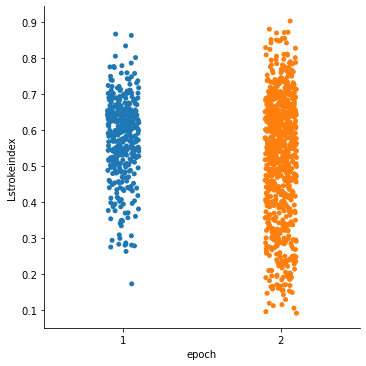

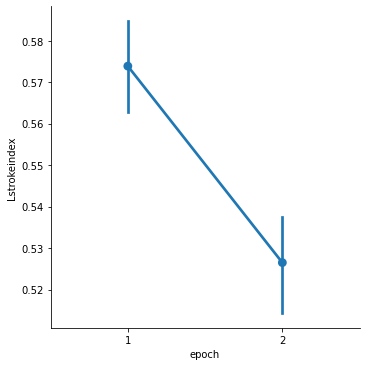

In [27]:
N = 10 # num bins

# -- make bins
binsy = np.linspace(min(SF[y]), max(SF[y]), N)
ybins = np.digitize(SF[y].values, binsy)

# add this as a column
SF["distance_binned"] = ybins

sns.catplot(data=SF, x="distance_binned", y="Lstrokeindex", hue="epoch", aspect=2)
sns.catplot(data=SF, x="distance_binned", y="Lstrokeindex", hue="epoch", aspect=2, kind="point")

sns.catplot(data=SF, x="epoch", y="Lstrokeindex")
sns.catplot(data=SF, x="epoch", y="Lstrokeindex", kind="point")
# sns.catplot(data=SF, x="distance_binned", y="Lstrokeindex", hue="epoch", aspect=2, kind="point")


In [10]:
# -- this epoch
Hlist = []
Xlist = []
Ylist = []
for ep in [1,2]:
    X = SF[SF["epoch"]==ep][k].values
    Y = SF[SF["epoch"]==ep][y].values
    H, xedges, yedges = np.histogram2d(X, Y, [binsx, binsy], density=True)
    Hlist.append(H.T)
    Ylist.append(yedges)
    Xlist.append(xedges)


# 2) assign each trial a bin

# 3) aggreagtions

,strokenum,session,trial,date,task,datetime,task_kind,task_category,random_task,circularity,distance,Lstrokeindex,keepstroke,index_x,epoch,index_y,traintest
250,0,1,231,200923,3linePlusL_4-savedset-1,2020-09-23 14:22:41,probe3,3linePlusL,False,0.044359,200.998617,0.513852,True,250,1,250,test
251,1,1,231,200923,3linePlusL_4-savedset-1,2020-09-23 14:22:41,probe3,3linePlusL,False,0.105631,139.422777,0.569149,True,251,1,251,test
252,2,1,231,200923,3linePlusL_4-savedset-1,2020-09-23 14:22:41,probe3,3linePlusL,False,0.011961,103.210375,0.634984,True,252,1,252,test
421,0,1,308,200923,linePlusLv2_47-savedset-3,2020-09-23 14:40:51,probe3,linePlusLv2,False,0.212367,357.991496,0.655069,True,421,1,421,test
424,0,1,310,200923,LplusL_10-savedset-1,2020-09-23 14:41:22,probe3,LplusL,False,0.058945,302.179734,0.603522,True,424,1,424,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,0,1,762,201001,2linePlusL_6-savedset-1,2020-10-01 17:26:00,probe3,2linePlusL,False,0.039452,85.048046,0.479081,True,7294,2,7294,test
7295,1,1,762,201001,2linePlusL_6-savedset-1,2020-10-01 17:26:00,probe3,2linePlusL,False,0.004502,119.947118,0.350660,True,7295,2,7295,test
7308,0,1,766,201001,LplusL_4-savedset-1,2020-10-01 17:27:01,probe3,LplusL,False,0.014114,90.287998,0.490806,True,7308,2,7308,test
7309,1,1,766,201001,LplusL_4-savedset-1,2020-10-01 17:27:01,probe3,LplusL,False,0.010469,95.723606,0.487810,True,7309,2,7309,test


In [49]:
only_first_last_trials = False

for animal in ["Pancho", "Red"]:
# for animal in ["Red"]:
    # for animal in ["Pancho"]:
    
    FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
    sdate = MD["sdate"]
    edate = MD["edate"]
    strokmodel_kind = MD["strokmodel_kind"]
    strokmodel_tstamp = MD["strokmodel_tstamp"]
    datecategories = MD["datecategories"]
    dates_for_summary = MD["dates_for_summary"]
    matchedstrokes = MD["matchedstrokes"]
    task_train_test = MD["task_train_test"]
    datelist_all = getDateList(sdate, edate)
    exptMetaDat = MD
    
    # saving dir
    SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_modelexpt_multsession/{expt}/multday_{animal}_{sdate}_to_{edate}/strokmodel"
    import os
    os.makedirs(SAVEDIR, exist_ok=True)
    print(f"saving at {SAVEDIR}")

    # ==== Flatten all trials across days x animals
    # for each trial collect relevant information
    PROBEDAT = PROBEDATfromFD(FD)
    

    # ==== EXTRACT STROKE MODEL RESULTS
    if strokmodel_kind is not None:
        modResGetter = modelResultsGetter(PROBEDAT, model=strokmodel_kind, 
                                          fit_tstamp = strokmodel_tstamp)
    else:
        modResGetter = None
        

    # fig = sns.pairplot(data=DF2, vars=[1,2,"strok_dur", "0/(0+1)", "0/1"], height=5, markers=["x"])
    SAVEDIR = f"{SAVEDIR}/model_results"
    import os
    os.makedirs(SAVEDIR, exist_ok=True)
    print(f"saving at {SAVEDIR}")

    datelist = MD["dates_for_summary"]
    strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, datelist, only_shared_tasks=False)

    m = lambda date, session, trial, strok_num: modResGetter(animal, date, expt, 
                                                             session, trial, strok_num)

    for traintest in ["train", "test"]:
        for k in ["Lstrokeindex"]:
            SF = strokfeats2Dataframe(strokfeats, exptMetaDat, only_first_last_trials=only_first_last_trials,
                         matchedstrokes=matchedstrokes, 
                         traintest=traintest, modResGetter=m,
                        modResKeyname=k, only_if_has_model_res=True,
                        only_if_task_in_all_epochs=True)
            
            ### ========== 2D HISTOGRAM FOR DISTANCE/CIRC
            def plot2dhist(SF, k,y, N):
                """ k and y are features for x an y axis.
                items in SF (dataframe)"""
                # -- make bins
                binsx = np.linspace(min(SF[k]), max(SF[k]), N)
                binsy = np.linspace(min(SF[y]), max(SF[y]), N)

                # -- this epoch
                Hlist = []
                Xlist = []
                Ylist = []
                for ep in [1,2]:
                    X = SF[SF["epoch"]==ep][k].values
                    Y = SF[SF["epoch"]==ep][y].values
                    H, xedges, yedges = np.histogram2d(X, Y, [binsx, binsy], density=True)
                    Hlist.append(H.T)
                    Ylist.append(yedges)
                    Xlist.append(xedges)


                # --- epoch 2 minus 1
                Hlist.append(Hlist[1] - Hlist[0])

                # --- PLOT
                fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
                xedges = Xlist[0]
                yedges = Ylist[0]
                for i, H in enumerate(Hlist):
                    ax = axes[i]
                    if i in [0,1]:
                        cmap = "Reds"
                        h = H
                        vmin=0.
                        vmax=np.max(np.abs(h))
                        t=f"epoch {i}, vrange={vmin:.4f}-{vmax:.4f}"
                    elif i ==2:
                        cmap = "bwr"
                        h = H
                        vmin = -np.max(np.abs(h))
                        vmax = np.max(np.abs(h))
                        t=f"diff,  vrange={vmin:.4f}-{vmax:.4f}"
                    ax.imshow(h, interpolation='nearest', origin='lower',
                            extent=[0, xedges[-1], yedges[0], yedges[-1]], 
                              aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)
                    ax.set_title(t)
                    ax.set_xlabel(k)
                    ax.set_ylabel(y)
                return fig                        
            
            if len(SF)>0:
                # === distribution of lstroke ind
                fig = sns.catplot(data=SF, x="epoch", y="Lstrokeindex")
                fig.savefig(f"{SAVEDIR}/Lstrokeindex-{traintest}-1.pdf")
                fig = sns.catplot(data=SF, x="epoch", y="Lstrokeindex", kind="point")
                fig.savefig(f"{SAVEDIR}/Lstrokeindex-{traintest}-2.pdf")

                for N in [10, 20, 30, 40, 50]:
                    kk = "distance"
                    yy = "circularity"
                    fig = plot2dhist(SF, kk, yy, N)
                    fig.savefig(f"{SAVEDIR}/{yy}-vs-{kk}-{traintest}-diff-bins{N}.pdf")

                    
                for y in ["circularity", "distance"]:
                    
                    # ============== 1) 2d distributions
                    fig = sns.displot(SF, x=k, y=y, col="epoch", rug=True, stat="probability", 
                                rug_kws={"alpha":0.5, "linewidth": 0.1, "height":0.04})
                    plt.xlim([0,1])

                    # ---save
                    fig.savefig(f"{SAVEDIR}/{y}-vs-{k}-{traintest}.pdf")
    
                    # ================== condition on y, get Lstrokeindex
                    N = 10 # num bins

                    # -- make bins
                    binsy = np.linspace(min(SF[y]), max(SF[y]), N)
                    SF[f"{y}_binned"] = np.digitize(SF[y].values, binsy)
                    
                    fig = sns.catplot(data=SF, x=f"{y}_binned", y="Lstrokeindex", hue="epoch", aspect=2)
                    fig.savefig(f"{SAVEDIR}/{y}-condon-Lstrokeindex-{traintest}-bins{N}-1.pdf")
                    fig = sns.catplot(data=SF, x=f"{y}_binned", y="Lstrokeindex", hue="epoch", aspect=2, kind="point")
                    fig.savefig(f"{SAVEDIR}/{y}-condon-Lstrokeindex-{traintest}-bins{N}-2.pdf")
    
                    # ============= PLOT DIFFERENCE IN HISTOGRAMS
                    for N in [10, 20, 30, 40, 50]:
                        fig = plot2dhist(SF, k, y, N)
                
#                         # -- make bins
#                         binsx = np.linspace(min(SF[k]), max(SF[k]), N)
#                         binsy = np.linspace(min(SF[y]), max(SF[y]), N)

#                         # -- this epoch
#                         Hlist = []
#                         Xlist = []
#                         Ylist = []
#                         for ep in [1,2]:
#                             X = SF[SF["epoch"]==ep][k].values
#                             Y = SF[SF["epoch"]==ep][y].values
#                             H, xedges, yedges = np.histogram2d(X, Y, [binsx, binsy], density=True)
#                             Hlist.append(H.T)
#                             Ylist.append(yedges)
#                             Xlist.append(xedges)


#                         # --- epoch 2 minus 1
#                         Hlist.append(Hlist[1] - Hlist[0])

#                         # --- PLOT
#                         fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
#                         xedges = Xlist[0]
#                         yedges = Ylist[0]
#                         for i, H in enumerate(Hlist):
#                             ax = axes[i]
#                             if i in [0,1]:
#                                 cmap = "Reds"
#                                 h = H
#                                 vmin=0.
#                                 vmax=np.max(np.abs(h))
#                                 t=f"epoch {i}, vrange={vmin:.4f}-{vmax:.4f}"
#                             elif i ==2:
#                                 cmap = "bwr"
#                                 h = H
#                                 vmin = -np.max(np.abs(h))
#                                 vmax = np.max(np.abs(h))
#                                 t=f"diff,  vrange={vmin:.4f}-{vmax:.4f}"
#                             ax.imshow(h, interpolation='nearest', origin='lower',
#                                     extent=[0, 1, yedges[0], yedges[-1]], 
#                                       aspect="auto", cmap=cmap, vmin=vmin, vmax=vmax)
#                             ax.set_title(t)
#                             ax.set_xlabel(k)
#                             ax.set_ylabel(y)

                        fig.savefig(f"{SAVEDIR}/{y}-vs-{k}-{traintest}-diff-bins{N}.pdf")
    
                    plt.close("all")

This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}, 'expt': 'lines5'}

Getting these dates:
['200921', '200922', '200923', '200924', '200925', '200926', '200927', '200928', '200929', '200930', '201001']
['lines5', 'Pancho', '200921']
- No h5 file for Pancho, 200921, lines5, 0 - returning None!
-- loaded presaved data: /data2/animals/Pancho/200921/200921_141055_lines5_Pancho_1.pkl
got 811 tot

-- loaded presaved data: /data2/animals/Pancho/201001/201001_150506_lines5_Pancho_1.pkl
got 699 total trials
NO TASKSETS FOUND!! (is ok as long as this is desired)
NO TASKSETS FOUND!! (is ok as long as this is desired)
appending fd for sess 1
- No h5 file for Pancho, 201001, lines5, 2 - returning None!
- No h5 file for Pancho, 201001, lines5, 3 - returning None!
- No h5 file for Pancho, 201001, lines5, 4 - returning None!
- No h5 file for Pancho, 201001, lines5, 5 - returning None!
- No h5 file for Pancho, 201001, lines5, 6 - returning None!
- No h5 file for Pancho, 201001, lines5, 7 - returning None!
- No h5 file for Pancho, 201001, lines5, 8 - returning None!
- No h5 file for Pancho, 201001, lines5, 9 - returning None!
===== SUMMARY
--
Pancho-200921-1: ntrials: 812

--
Pancho-200922-2: ntrials: 863

--
Pancho-200923-1: ntrials: 114

--
Pancho-200923-2: ntrials: 378

--
Pancho-200923-3: ntrials: 233

--
Pancho-200924-1: ntrials: 436

--
Pancho-200924-2: ntrials: 333

--
Pancho-200925-

/data1/code/python/pythonlib/pythonlib/drawmodel/features.py:94: RuntimeWarning: invalid value encountered in double_scalars
  return [1-p/t for p,t in zip(displace,distance)]


This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}, 'expt': 'lines5'}

Getting these dates:
['200921', '200922', '200923', '200924', '200925', '200926', '200927', '200928', '200929', '200930', '201001']
['lines5', 'Red', '200921']
- No h5 file for Red, 200921, lines5, 0 - returning None!
-- loaded presaved data: /data2/animals/Red/200921/200921_135553_lines5_Red_1.pkl
got 986 total trials
ap

got 984 total trials
got 878 total trials
got 545 total trials
got 504 total trials
got 77 total trials
got 759 total trials
got 1134 total trials
got 1258 total trials
got 1055 total trials
got 1007 total trials
got 876 total trials
got 811 total trials
-- loaded presaved data: /data2/animals/Red/200926/200926_143110_lines5_Red_1.pkl
got 1134 total trials
NO TASKSETS FOUND!! (is ok as long as this is desired)
[Errno 2] No such file or directory: '/data2/analyses/main/strokmodelfits-201006_032853_lines5/Red-lines5-200926-1-spatial.pkl'
SKIPPING
-- loaded presaved data: /data2/animals/Red/200925/200925_152506_lines5_Red_2.pkl
got 759 total trials
[Errno 2] No such file or directory: '/data2/analyses/main/strokmodelfits-201006_032853_lines5/Red-lines5-200925-2-spatial.pkl'
SKIPPING
-- loaded presaved data: /data2/animals/Red/200929/200929_143406_lines5_Red_1.pkl
got 1007 total trials
NO TASKSETS FOUND!! (is ok as long as this is desired)
NO TASKSETS FOUND!! (is ok as long as this is desi

/data1/code/python/pythonlib/pythonlib/drawmodel/features.py:94: RuntimeWarning: invalid value encountered in double_scalars
  return [1-p/t for p,t in zip(displace,distance)]


## replotting summaries of strok features
Like above, but I feel like those plots werent great

1d distributions

In [ ]:
only_first_last_trials = False

for animal in ["Pancho", "Red"]:
# for animal in ["Red"]:
    # for animal in ["Pancho"]:
    
    FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
    sdate = MD["sdate"]
    edate = MD["edate"]
    strokmodel_kind = MD["strokmodel_kind"]
    strokmodel_tstamp = MD["strokmodel_tstamp"]
    datecategories = MD["datecategories"]
    dates_for_summary = MD["dates_for_summary"]
    matchedstrokes = MD["matchedstrokes"]
    task_train_test = MD["task_train_test"]
    datelist_all = getDateList(sdate, edate)
    exptMetaDat = MD

    
    # ==== Flatten all trials across days x animals
    # for each trial collect relevant information
    PROBEDAT = PROBEDATfromFD(FD)
    

    # ==== EXTRACT STROKE MODEL RESULTS
    if strokmodel_kind is not None:
        modResGetter = modelResultsGetter(PROBEDAT, model=strokmodel_kind, 
                                          fit_tstamp = strokmodel_tstamp)
    else:
        modResGetter = None
        

    datelist = MD["dates_for_summary"]
    strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, datelist, only_shared_tasks=False)

    SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_modelexpt_multsession/{expt}/multday_{animal}_{sdate}_to_{edate}/strokmodel/poolallstrokes"
    import os
    os.makedirs(SAVEDIR, exist_ok=True)
    print(f"saving at {SAVEDIR}")

    for traintest in ["train", "test"]:
        SF = strokfeats2Dataframe(strokfeats, exptMetaDat, only_first_last_trials=only_first_last_trials,
                     matchedstrokes=matchedstrokes, 
                     traintest=traintest, modResGetter=None,
                                  only_if_has_model_res=False,
                    only_if_task_in_all_epochs=True)
        if len(SF)>0:
            for y in ["circularity", "distance"]:
                fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, squeeze=False, figsize=(6, 10))
                bins = np.linspace(min(SF[y]), max(SF[y]), 25)
                for i, ep in enumerate([1,2]):
                    ax = axes[i][0]
                    sns.histplot(ax=axes[i][0], data=SF[SF["epoch"]==ep], x=y, stat="probability", bins=bins)
                    # - overlay mdeian
                    ax.axvline(np.nanmedian(SF[SF["epoch"]==ep][y]), color="r", linewidth=3)
                    axes[i][0].set_title(f"epoch {ep}")

                fig.savefig(f"{SAVEDIR}/distplot-{traintest}-{y}.pdf")


In [ ]:
sns.displot(data=SF, x="circularity", col="epoch", stat="count", sharey=True)
sns.displot(data=SF, x="distance", col="epoch", stat="count")

In [ ]:
sns.displot(data=SF, x="distance",  hue="epoch", stat="density", kind="kde", bins=20, common_bins=True)

In [ ]:
sns.pairplot(data=SF, vars=["circularity", "distance"], hue="epoch")

### SCRATCH

In [ ]:
# ALTERNATIVE PLOTS - not as good as displot
# === PLOT 2D HISTOGRAM
sns.pairplot(data=SF, vars=["distance", "Lstrokeindex"], hue="epoch", height=5, markers="x")

sns.jointplot(data=SF, x="Lstrokeindex", y="distance", kind="hist")

In [ ]:
# def strokfeats2Dataframe(strokfeats, exptMetaDat, only_first_last_trials=False,
#                          matchedstrokes=None, 
#                          traintest="bothtraintest", modResGetter=None,
#                         modResKeyname="Lstrokeindex", only_if_has_model_res=True,
#                         only_if_task_in_all_epochs=True):
#     """ convert to dataframe and then process in 
#     ways related to expt and model-basked (strok model)
#     analysis
#     - exptMetaDat, 
#     - matchedstrokes, list of stroknums (0, 1.,,, ), that will;
#     be considered "good" strokes. useful if want to only analyze 
#     partocular strokes
#     - traintest, "train" or "test" or "bothtraintest", will
#     only keep that.
#     - modResGetter, function that gets modelscore for paritcular trial
#     modResGetter(date, session, trial, strok_num). leave None to ignore.
#     - modResKeyname, to name the score extracted.
#     - only_if_has_model_res, throws out data that has no model result.
#     """
#     from pythonlib.tools.pandastools import applyFunctionToAllRows

#     #### move all below into plotting function
#     # === ADD MODEL RESULTS
#     k = modResKeyname
#     if modResGetter is not None:
#         if k=="Lstrokeindex":
#             kactual = "0/(0+1)" # to fix bullshit naming problem I had.
#         for s in strokfeats:
#             mod_res = modResGetter(date=s["date"], session=s["session"], trial=s["trial"], 
#                                         strok_num=s["strokenum"])
#             if mod_res is not None:
#                 s[k] = mod_res[kactual].values[0]
#             else:
#                 s[k] = np.nan                

#     ## === 1) CONVERT TO DATAFRAME FOR PLOTTING
#     SF = pd.DataFrame(strokfeats)

#     ## === 2) Process:refelcting experimental structure

#     # --- aggregate over strokes of a desired index
#     if matchedstrokes is None:
#         # then all strokes are good
#         SF["keepstroke"] = True
#     else:
#         F = lambda x:x["strokenum"] in matchedstrokes
#         SF = applyFunctionToAllRows(SF, F, newcolname="keepstroke")

#     # --- expt epoch.
#     F = lambda x:exptMetaDat["datecategories"][x["date"]]
#     SF = applyFunctionToAllRows(SF, F, newcolname="epoch")

#     # --- call each task either test or train
#     F = lambda x:exptMetaDat["task_train_test"][x["task_kind"]]
#     SF = applyFunctionToAllRows(SF, F, newcolname="traintest")

#     if traintest in ["train", "test"]:
#         SF = SF[SF["traintest"]==traintest]
#     elif traintest=="bothtraintest":
#         SF = SF

#     # == only keep if includes model results
#     if only_if_has_model_res:
#         if modResGetter is not None:
#             SF = SF[~np.isnan(SF[k])]
#         else:
#             # === add fake k (so can use same plotting code as for model)
#             SF[k] = 0


#     # - only keep tasks that have at least one datapoint in epoch1 and 2
#     if only_if_task_in_all_epochs:
#         epochs_to_check = list(set([d for d in exptMetaDat["datecategories"].values()]))
#         def F(x, epochs_to_check = epochs_to_check):
#             """ True if has data for all epochs"""
#             checks  = []
#             for ep in epochs_to_check:
#                 checks.append(ep in x["epoch"].values)
#         #     if all(checks):
#         #         print(checks)
#         #         print(x)
#         #         assert False
#             return all(checks)
#         SF = SF.groupby(["task"]).filter(F)


#     #  ==== ONLY INCLUDE LAST (OF FIRST EPOCH) AND FIRST (OF LAST EPOCH) TRIALS
#     if only_first_last_trials:
#         # -- get last trial for first epoch
#         tmp = SF[SF["epoch"]==1]
#         tmp = tmp[tmp.groupby(["task", "epoch"])["datetime"].transform(max) == tmp["datetime"]]


#         # -- get first trial of last epoch
#         tmp2 = SF[SF["epoch"]==2]
#         tmp2= tmp2[tmp2.groupby(["task", "epoch"])["datetime"].transform(min) == tmp2["datetime"]]

#         # -- combine in a new dataframe
#         SF = pd.concat([tmp, tmp2])

#     return SF


## plot metadat across days
(this good)

*** obsolete - MOVED ABOVE


In [ ]:
# # This only deals with both random and fixed tasks.
# # TO DO: assign each task to whether is G1, G2, G3 (subgroups for test tasks)

# datelist = datelist_all

# for animal in ["Pancho", "Red"]:
    
#     dattoget = []
#     for d in datelist:
#         dattoget.append([expt, animal, d])
        
#     FD = loadMultData(dattoget)

#     # saving dir
#     SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_modelexpt_multsession/{expt}/multday_{animal}_{sdate}_to_{edate}/strokmodel"
#     import os
#     os.makedirs(SAVEDIR, exist_ok=True)
#     print(f"saving at {SAVEDIR}")

#     # ==== Flatten all trials across days x animals
#     # for each trial collect relevant information
#     PROBEDAT = PROBEDATfromFD(FD)

#     # then should get all trials to make sure not miss any
#     from pythonlib.tools.datetools import getDateList
# #     DATELIST = getDateList("200902", "200907")

# #     datecategories = {
# #         "200902":1, 
# #         "200903":1,
# #         "200904":2,
# #         "200905":2,
# #         "200906":2,
# #         "200907":2}

#     only_shared_tasks = False # not needed, since will filter below to make sure in both epochs.

# #     task_train_test = {
# #     'probe1_liketrain':"train",
# #     'probe1_nostrokeconstraint':"train",
# #     'probe3':"test",
# #     'probe3_hdpos':"test",
# #     'train':"train"}

#     matchedstrokes = [0,1] # these strokes are aggregated on each day. expect these to be comaprable across days.

#     only_shared_tasks = False # not needed, since will filter below to make sure in both epochs.
#     strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, datelist, only_shared_tasks=only_shared_tasks)

#     ## CONVERT TO DATAFRAME FOR PLOTTING
#     SF = pd.DataFrame(strokfeats)

#     ## APPEND columns refelcting experimental structure
#     from pythonlib.tools.pandastools import applyFunctionToAllRows

#     # --- aggregate over strokes of a desired index
#     F = lambda x:x["strokenum"] in matchedstrokes
#     SF = applyFunctionToAllRows(SF, F, newcolname="keepstroke")

#     # --- aggregate over strokes of a desired index
#     F = lambda x:datecategories[x["date"]]
#     SF = applyFunctionToAllRows(SF, F, newcolname="epoch")

#     # --- call each task either test or train
#     F = lambda x:task_train_test[x["task_kind"]]
#     SF = applyFunctionToAllRows(SF, F, newcolname="traintest")

#     fig1 = sns.catplot(x="date", y="task_category", hue="random_task", data=SF, aspect=3, row_order=sorted(set(SF["task_category"])), alpha=0.02)
#     fig2 = sns.catplot(x="date", y="task_category", hue="random_task", row="traintest", data=SF, aspect=3, alpha=0.02)
#     fig4 = sns.catplot(x="date", y="task_category", row="random_task", col="traintest", hue="task_kind",
#                      sharex=True, sharey=False, aspect=2, data=SF, orient="v")
#     rotateLabel(fig4, 25)
    
#     # for fixed tasks only
#     # sns.catplot(x="date", y="task", hue="task_category", row="traintest", data=SF[SF["random_task"]==False], 
#     #             height=10, aspect=1, row_order=sorted(set(SF["task"])))
#     H = len(list(set(SF[SF["random_task"]==False]["task"])))*(1/5)
#     fig3 = sns.catplot(x="date", y="task", hue="task_category", row="traintest", data=SF[SF["random_task"]==False], 
#                 height=H, aspect=1, )
    
    
#     fig1.savefig(f"{SAVEDIR}/overview-1.pdf")
#     fig2.savefig(f"{SAVEDIR}/overview-2.pdf")
#     fig3.savefig(f"{SAVEDIR}/overview-3.pdf")
#     fig4.savefig(f"{SAVEDIR}/overview-4.pdf")
    


In [ ]:
# assign each task to a "goal" of the task (e.g., G1, G2,...)



In [ ]:
len(list(set(SF[SF["random_task"]==False]["task"])))

height = len(list(set(SF[SF["random_task"]==False]["task"])))*(1/5)

In [ ]:
# == 1) For each day, plot tasks sorted by category.

for date in DATELIST:
    print(f"======= {date}")
    traintaskcats = sorted(set([P["task_stagecategory"] for P in PROBEDAT if P["date"]==date]))
    for cat in traintaskcats:
        print(f"--- {cat}")
        for RANDOM in [True, False]:
            tasknames = sorted(set([P["unique_task_name"] for P in PROBEDAT
                              if P["date"]==date
                              and P["random_task"]==RANDOM
                                   and P["task_stagecategory"]==cat]))
            if len(tasknames)==0:
                continue
            if RANDOM:
                print("-RANDOM")
            else:
                print("-FIXED")
            if len(tasknames)>15:
                print(f"found {len(tasknames)} tasks, eg {tasknames[0]}")
            else:
                print(tasknames)
#         assert False
                          
    
    
    
    

 



## Plot all tasks (no behavior)


## IN PROGRESS..

# [DEVLOPMENT BELOW]


# CATEGORIZE STROKES

In [ ]:
# ******** 1) Plot grid of all strokes to visualize if any structure


In [ ]:
# ***** 2) Do stuff with the timecourse?

i = random.randint(0, len(PROBEDAT))

In [ ]:
plotTrialSingleOverview(PROBEDAT[i]["filedata"], PROBEDAT[i]["trial"]);
# plotTrialSimpleTimecourse(PROBEDAT[i]["filedata"], PROBEDAT[i]["trial"])
# plotTrialSimple(PROBEDAT[i]["filedata"], PROBEDAT[i]["trial"], zoom=True, plotver="order", kwargs={'each_stroke_separate': True})

### FIT GENERATIVE MODEL FOR SINGLE STROKES
### See other notebook for model-only


## === SCRATCH



    2a) Cluster strokes:
    a) using statistics above
    b) pairwise distance matrix;
    show that there are lines and Ls as two distinct clusters.


    2) Categories strokes
    - for each stroke, categorize based on the clustering model above.
    [ Or do it in a supervised way?]
    -- goal: 2d plot (line weight vs. L-weight, probabilistic).

    3) Model-based analysis - assigning entire parse a score.